# Car Price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [2]:
# df = pd.read_csv('car data.csv')
# df

In [3]:
df = pd.read_csv('Car details v3.xls')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
df.shape

(8128, 13)

In [5]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

# Missing Values

In [8]:
na_features = [features for features in df if (df[features].isna().sum())>0]
print(na_features)

df[na_features]

['mileage', 'engine', 'max_power', 'torque', 'seats']


,mileage,engine,max_power,torque,seats
0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...
8123,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


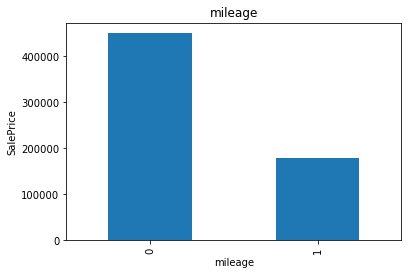

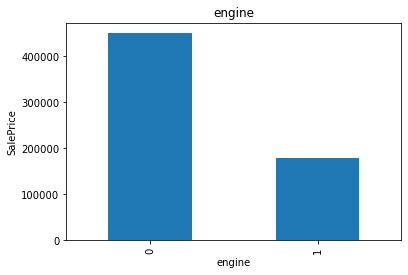

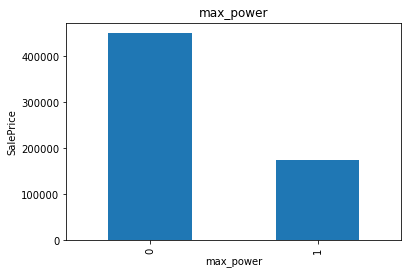

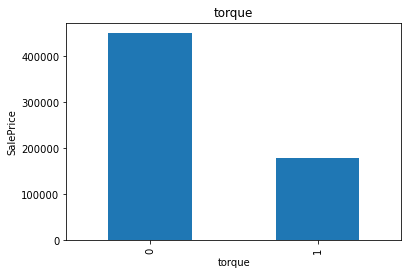

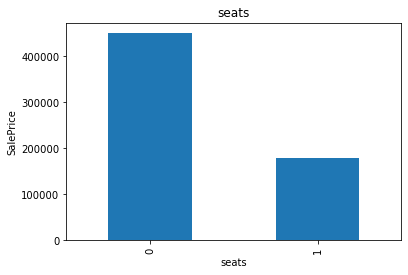

In [9]:
for features in na_features:    
    # returns 1 where there is nan value and 0 where there is no nan value
    df1 = df.copy()
    df1[features] = np.where(df1[features].isna(),1,0)  
    
    # Now grouping the features and finding mean of selling price - (all the 1's, their mean sellingprice)(all 0's, their mean sellingprice)
    df1.groupby(features)['selling_price'].median().plot.bar()
    plt.ylabel('SalePrice')
    plt.title(features)
    plt.show()

We can see that the nan value is also contributing for the increased selling price.So, right now i will not drop any nan value but will do something in feature engineering

# Numerical Values

In [10]:
numerical_features = df.select_dtypes(exclude='O').columns
print(numerical_features)

df[numerical_features]

Index(['year', 'selling_price', 'km_driven', 'seats'], dtype='object')


,year,selling_price,km_driven,seats
0,2014,450000,145500,5.0
1,2014,370000,120000,5.0
2,2006,158000,140000,5.0
3,2010,225000,127000,5.0
4,2007,130000,120000,5.0
...,...,...,...,...
8123,2013,320000,110000,5.0
8124,2007,135000,119000,5.0
8125,2009,382000,120000,5.0
8126,2013,290000,25000,5.0


In [11]:
#lets find out how many values are there in each feature
numerical_features_count = {features:len(df[features].unique()) for features in numerical_features}
print(numerical_features_count)

{'year': 29, 'selling_price': 677, 'km_driven': 921, 'seats': 10}


## Discrete numerical variables

In [12]:
discrete_features = [features for features in numerical_features if len(df[features].unique())<15]
print(discrete_features)

['seats']


<AxesSubplot:xlabel='seats'>

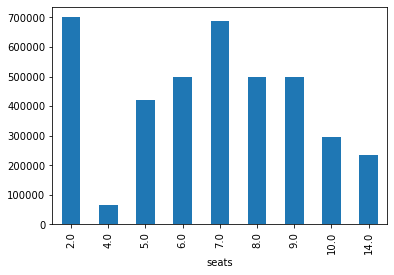

In [13]:
#let's check the relation with target variable
df.groupby('seats')['selling_price'].median().plot.bar()

2 and 7 seater car are more costlier

## Continous numerical variables

['selling_price', 'km_driven']


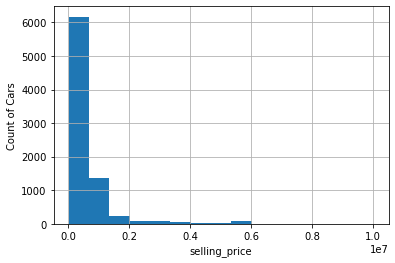

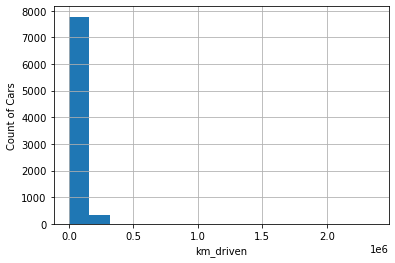

In [14]:
continuous_features = [features for features in numerical_features if features not in discrete_features+['year']]
print(continuous_features)

for features in continuous_features:
    df[features].hist(bins=15)
    plt.xlabel(features)
    plt.ylabel('Count of Cars')
    plt.show()

# Observation

1. Car whose range is b/w 0-2 lakhs are more
2. Car travelled 0-125000 kms are more

The data is left skewed so we will take log of this in feature engineering if required to make it normal

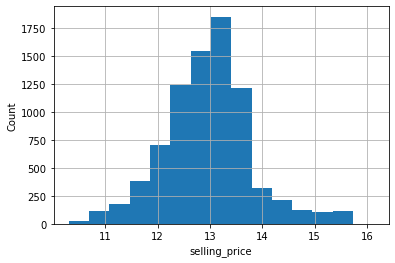

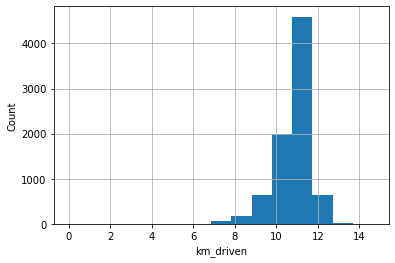

In [15]:
# Taking log to see if the skewness is going or not

df1 = df.copy()
for features in continuous_features:
    if 0 in df1[features].unique(): # because log 0 is infinity
        pass
    else:
        df1[features] = np.log(df1[features])
        df1[features].hist(bins=15)
        plt.xlabel(features)
        plt.ylabel('Count')
        plt.show()
        

# Categorical features

In [16]:
categorical_features = df.select_dtypes(include='O').columns
print(categorical_features)

df[categorical_features]

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage',
       'engine', 'max_power', 'torque'],
      dtype='object')


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
1,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm
2,Honda City 2017-2020 EXi,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)"
3,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm
4,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)"
...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm
8124,Hyundai Verna CRDi SX,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)"
8125,Maruti Swift Dzire ZDi,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm
8126,Tata Indigo CR4,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm


# Cardinality of categorical features

In [17]:
#lets find out how many categories are there in each feature and what are the categories
categorical_features_count = {features:len(df[features].unique()) for features in categorical_features}
print(categorical_features_count)
print()


for features in categorical_features:
    if features in 'fuel'+'seller_type'+'transmission'+'owner': #because others has too many categories
        print(features,'-',df[features].unique())

{'name': 2058, 'fuel': 4, 'seller_type': 3, 'transmission': 2, 'owner': 5, 'mileage': 394, 'engine': 122, 'max_power': 323, 'torque': 442}

fuel - ['Diesel' 'Petrol' 'LPG' 'CNG']
seller_type - ['Individual' 'Dealer' 'Trustmark Dealer']
transmission - ['Manual' 'Automatic']
owner - ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


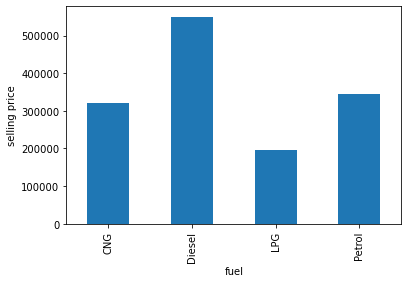

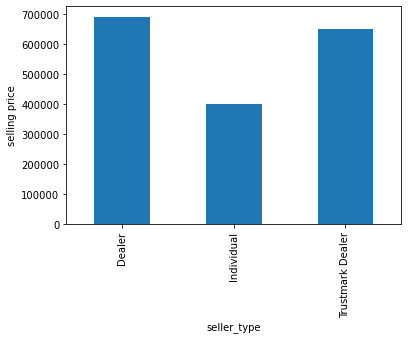

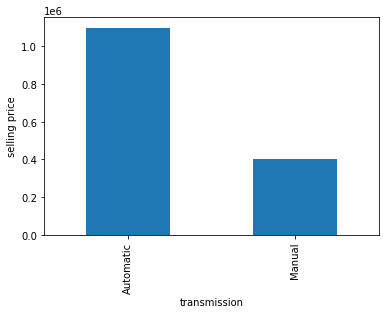

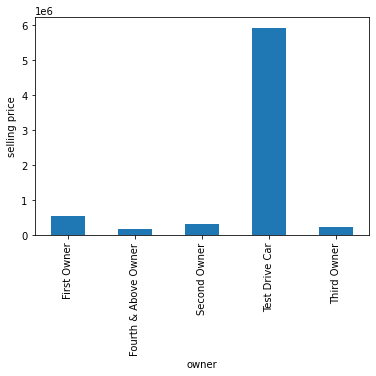

In [18]:
# now we will see the relationship between target variable and categorical varibale
for features in categorical_features:
    if features in 'fuel'+'seller_type'+'transmission'+'owner': #because others has too many categories
        df.groupby(features)['selling_price'].median().plot(kind='bar')
        plt.xlabel(features)
        plt.ylabel('selling price')
        plt.show()

# Observation

1. Diesel Car are costlier
2. Car which is sold by Dealer are more expensive
3. Automatic cars are costlier
4. Test drive cars are very very costly as comapared with others


# Temporal Variable

<AxesSubplot:xlabel='year'>

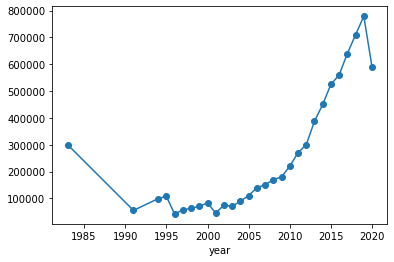

In [19]:
# here we have one datetime feature also
year_feature = 'year'
df.groupby('year')['selling_price'].median().plot(marker='o')

As the year increases the price also increasing but after a point it is decreasing.let's see what's happening

<AxesSubplot:xlabel='year'>

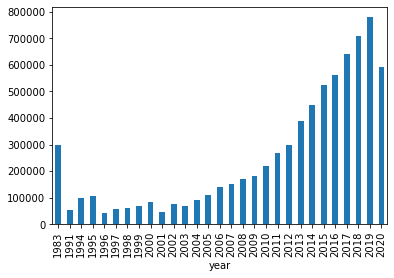

In [20]:
df.groupby('year')['selling_price'].median().plot(kind='bar')

More cars were in the year 2019

In [21]:
#To convert the year in numbers - by this we can say that ritz is 8 years old like that
df['years'] = 2022 - df['year']
df.drop('year',axis=1,inplace=True)

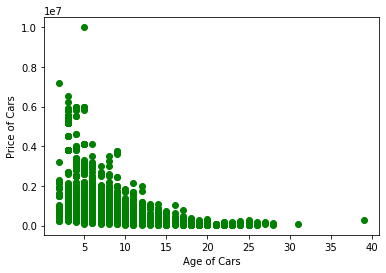

In [22]:
plt.scatter(df['years'],df['selling_price'],c='g')
plt.xlabel('Age of Cars')
plt.ylabel('Price of Cars')
plt.show()

Now good - the less the age of car is the more is price

# Feature Engineering

Cleaning all the features to fill their nan values

In [23]:
df['mileage'] = df['mileage'].astype(str)
df['engine'] = df['engine'].astype(str)
df['max_power'] = df['max_power'].astype(str)
df['torque'] = df['torque'].astype(str)


df['name'] = [name.split(' ')[0].strip() for name in df['name']]
df['owner'] = [owner.split(' ')[0].strip() for owner in df['owner']]
df['mileage'] = [mileage.split(' ')[0].strip() for mileage in df['mileage']]
df['engine'] = [engine.split(' ')[0].strip() for engine in df['engine']]
df['torque'] = [torque.split('@')[0].strip() for torque in df['torque']]

In [24]:
df['max_power'] = [engine.split(' ')[0].strip() for engine in df['max_power']]
df['max_power'] = np.where(df['max_power']=='',np.nan,df['max_power']) # because when converting into float it was giving error

In [25]:
def torque_func(i):
    if i == np.nan:
        return(np.nan)
    if 'Nm' in i:
        i = i.split('Nm')[0]
        return(i)
    elif 'nm' in i:
        i = i.split('nm')[0]
        return(i)
    elif 'NM' in i:
        i = i.split('NM')[0]
        return(i)
    elif 'kgm' in i:
        i = i.split('kgm')[0]
        i = round(float(i)*9.8,2)
        return(i) #to convert kg to nm
    elif 'KGM' in i:
        i = i.split('KGM')[0]
        i = round(float(i)*9.8,2)
        return(i) #to convert kg to nm
    elif '(' in  i:
        i = i.split('(')[0]
        i = round(float(i)*9.8,2)
        return(i) #to convert kg to nm
    elif '/' in i:
        i = i.split('/')[0]
        return(i)
    else:
        return(i)

In [26]:
df['torque'] = df['torque'].apply(torque_func)
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,years
0,Maruti,450000,145500,Diesel,Individual,Manual,First,23.4,1248,74,190,5.0,8
1,Skoda,370000,120000,Diesel,Individual,Manual,Second,21.14,1498,103.52,250,5.0,8
2,Honda,158000,140000,Petrol,Individual,Manual,Third,17.7,1497,78,12.7,5.0,16
3,Hyundai,225000,127000,Diesel,Individual,Manual,First,23.0,1396,90,219.52,5.0,12
4,Maruti,130000,120000,Petrol,Individual,Manual,First,16.1,1298,88.2,11.5,5.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,320000,110000,Petrol,Individual,Manual,First,18.5,1197,82.85,113.7,5.0,9
8124,Hyundai,135000,119000,Diesel,Individual,Manual,Fourth,16.8,1493,110,24,5.0,15
8125,Maruti,382000,120000,Diesel,Individual,Manual,First,19.3,1248,73.9,190,5.0,13
8126,Tata,290000,25000,Diesel,Individual,Manual,First,23.57,1396,70,140,5.0,9


In [27]:
df['mileage'] = df['mileage'].astype(float)
df['engine'] = df['engine'].astype(float)
df['max_power'] = df['max_power'].astype(float)
df['torque'] = df['torque'].astype(float)

In [28]:
df.isnull().sum()

name               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
torque           222
seats            221
years              0
dtype: int64

In [29]:
categorical_features = ['name','fuel', 'seller_type', 'transmission', 'owner']
numerical_features = ['km_driven','mileage','engine','max_power','torque','seats','years']

In [30]:
numerical_features_with_na = [features for features in numerical_features if (df[features].isna().sum())>0]
numerical_features_with_na

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [31]:
df

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,years
0,Maruti,450000,145500,Diesel,Individual,Manual,First,23.40,1248.0,74.00,190.00,5.0,8
1,Skoda,370000,120000,Diesel,Individual,Manual,Second,21.14,1498.0,103.52,250.00,5.0,8
2,Honda,158000,140000,Petrol,Individual,Manual,Third,17.70,1497.0,78.00,12.70,5.0,16
3,Hyundai,225000,127000,Diesel,Individual,Manual,First,23.00,1396.0,90.00,219.52,5.0,12
4,Maruti,130000,120000,Petrol,Individual,Manual,First,16.10,1298.0,88.20,11.50,5.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,320000,110000,Petrol,Individual,Manual,First,18.50,1197.0,82.85,113.70,5.0,9
8124,Hyundai,135000,119000,Diesel,Individual,Manual,Fourth,16.80,1493.0,110.00,24.00,5.0,15
8125,Maruti,382000,120000,Diesel,Individual,Manual,First,19.30,1248.0,73.90,190.00,5.0,13
8126,Tata,290000,25000,Diesel,Individual,Manual,First,23.57,1396.0,70.00,140.00,5.0,9


In [32]:
df.groupby(['fuel','transmission'])['mileage'].median()

fuel    transmission
CNG     Manual          26.20
Diesel  Automatic       16.78
        Manual          20.54
LPG     Manual          17.30
Petrol  Automatic       19.00
        Manual          18.90
Name: mileage, dtype: float64

In [33]:
#filling mileage nan values
conditions  = [ (df['fuel'] == 'CNG')    & (df['transmission'] == 'Manual'),
                (df['fuel'] == 'Diesel') & (df['transmission'] == 'Automatic'),
                (df['fuel'] == 'Diesel') & (df['transmission'] == 'Manual'),
                (df['fuel'] == 'LPG')    & (df['transmission'] == 'Manual'),
                (df['fuel'] == 'Petrol') & (df['transmission'] == 'Automatic'),
                (df['fuel'] == 'Petrol') & (df['transmission'] == 'Manual'),

]
choices     = [ 26.20, 16.78, 20.54, 17.30, 19.00, 18.90]
    
df['mileage'] = np.select(conditions, choices, default=np.nan)

In [34]:
df.groupby(['fuel','transmission'])['engine'].median()

fuel    transmission
CNG     Manual           998.0
Diesel  Automatic       1995.0
        Manual          1461.0
LPG     Manual          1061.0
Petrol  Automatic       1199.0
        Manual          1197.0
Name: engine, dtype: float64

In [35]:
#filling engine nan values
conditions  = [ (df['fuel'] == 'CNG')    & (df['transmission'] == 'Manual'),
                (df['fuel'] == 'Diesel') & (df['transmission'] == 'Automatic'),
                (df['fuel'] == 'Diesel') & (df['transmission'] == 'Manual'),
                (df['fuel'] == 'LPG')    & (df['transmission'] == 'Manual'),
                (df['fuel'] == 'Petrol') & (df['transmission'] == 'Automatic'),
                (df['fuel'] == 'Petrol') & (df['transmission'] == 'Manual'),

]
choices     = [ 998.0, 1995.0, 1461.0, 1061.0, 1199.0, 1197.0]
    
df['engine'] = np.select(conditions, choices, default=np.nan)

In [36]:
df.groupby(['fuel','transmission','engine'])['max_power'].median()

fuel    transmission  engine
CNG     Manual        998.0      60.015
Diesel  Automatic     1995.0    177.000
        Manual        1461.0     88.500
LPG     Manual        1061.0     58.200
Petrol  Automatic     1199.0     88.760
        Manual        1197.0     75.000
Name: max_power, dtype: float64

In [37]:
#filling max_power nan values
conditions  = [ (df['fuel'] == 'CNG')    & (df['transmission'] == 'Manual')    & (df['engine'] == 998.0),
                (df['fuel'] == 'Diesel') & (df['transmission'] == 'Automatic') & (df['engine'] == 1995.0),
                (df['fuel'] == 'Diesel') & (df['transmission'] == 'Manual')    & (df['engine'] == 1461.0),
                (df['fuel'] == 'LPG')    & (df['transmission'] == 'Manual')    & (df['engine'] == 1061.0),
                (df['fuel'] == 'Petrol') & (df['transmission'] == 'Automatic') & (df['engine'] == 1199.0),
                (df['fuel'] == 'Petrol') & (df['transmission'] == 'Manual')    & (df['engine'] == 1197.0),

]
choices     = [ 60.02, 177.00, 88.50, 58.20, 88.76, 75.00]
    
df['max_power'] = np.select(conditions, choices, default=np.nan)

In [38]:
df.groupby(['engine','max_power'])['torque'].median()

engine  max_power
998.0   60.02         80.5
1061.0  58.20         77.0
1197.0  75.00        102.0
1199.0  88.76        115.0
1461.0  88.50        200.0
1995.0  177.00       400.0
Name: torque, dtype: float64

In [39]:
#filling torque nan values
conditions  = [(df['engine'] == 998.0)  & (df['max_power'] == 60.02), 
               (df['engine'] == 1061.0) & (df['max_power'] == 58.20), 
               (df['engine'] == 1197.0) & (df['max_power'] == 75.0), 
               (df['engine'] == 1199.0) & (df['max_power'] == 88.76), 
               (df['engine'] == 1461.0) & (df['max_power'] == 88.50), 
               (df['engine'] == 1995.0) & (df['max_power'] == 177.0),] 
               

choices= [80.5, 77.0, 102.0, 115.0, 200.0, 400.0]   
df['torque'] = np.select(conditions, choices, default=np.nan)

In [40]:
#filling nan values of seats
df['seats'].fillna(5.0,inplace=True) #mode

In [41]:
df.isna().sum()

name             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
years            0
dtype: int64

No nan values now

In [42]:
df.corr()

,selling_price,km_driven,mileage,engine,max_power,torque,seats,years
selling_price,1.000000,-0.225534,-0.351024,0.527202,0.647565,0.541107,0.047135,-0.414092
km_driven,-0.225534,1.000000,0.263000,0.090692,-0.055642,0.085474,0.219860,0.418006
mileage,-0.351024,0.263000,1.000000,-0.140476,-0.463862,-0.127663,0.210006,0.073935
engine,0.527202,0.090692,-0.140476,1.000000,0.904555,0.997580,0.229243,-0.137972
max_power,0.647565,-0.055642,-0.463862,0.904555,1.000000,0.913487,0.094835,-0.188042
torque,0.541107,0.085474,-0.127663,0.997580,0.913487,1.000000,0.225402,-0.146394
seats,0.047135,0.219860,0.210006,0.229243,0.094835,0.225402,1.000000,-0.010222
years,-0.414092,0.418006,0.073935,-0.137972,-0.188042,-0.146394,-0.010222,1.000000


In [43]:
df.drop(columns = ['max_power','torque'],inplace = True)

In [44]:
# Converting categorical variables in number by one hot encoding
for features in categorical_features:
    dummy = pd.get_dummies(df[features],drop_first=True)
    df = pd.concat([df,dummy],axis=1)
    df.drop(features,axis=1,inplace=True)

df

,selling_price,km_driven,mileage,engine,seats,years,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land,Lexus,MG,Mahindra,Maruti,Mercedes-Benz,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,Diesel,LPG,Petrol,Individual,Trustmark Dealer,Manual,Fourth,Second,Test,Third
0,450000,145500,20.54,1461.0,5.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1,370000,120000,20.54,1461.0,5.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0
2,158000,140000,18.90,1197.0,5.0,16,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1
3,225000,127000,20.54,1461.0,5.0,12,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4,130000,120000,18.90,1197.0,5.0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,320000,110000,18.90,1197.0,5.0,9,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
8124,135000,119000,20.54,1461.0,5.0,15,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0
8125,382000,120000,20.54,1461.0,5.0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
8126,290000,25000,20.54,1461.0,5.0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0


In [45]:
X = df.drop('selling_price',axis=1)
y = df['selling_price']

In [46]:
# removing column which has correlation greater then 95%

# cor_matrix = X.corr().abs()
# upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
# X.drop(to_drop, axis=1,inplace=True)
# X.drop('const',axis=1,inplace=True)
# X

[3.05542615e-02 1.67140832e-05 6.08130415e-02 1.51006969e-02
 1.42615345e-01 3.91970973e-06 9.64850671e-03 1.29291081e-01
 7.09853472e-04 6.42520257e-09 2.47645328e-04 6.20568023e-05
 6.66674001e-06 2.80594176e-03 2.71463770e-03 1.33574777e-03
 1.42204293e-03 6.57161199e-03 1.53484753e-02 9.25004225e-05
 6.05521203e-03 8.55190736e-02 7.69453478e-04 7.91630666e-04
 5.79984222e-04 1.44234511e-02 9.65351813e-04 1.03081788e-04
 6.09099457e-09 3.06166917e-06 5.12432218e-04 4.86158161e-04
 5.33617713e-03 1.68542167e-02 3.92577933e-04 3.33576171e-02
 1.44656949e-02 1.35499255e-05 2.78090502e-05 2.77732521e-02
 2.03610658e-03 3.48669409e-01 2.68018666e-04 5.45715092e-03
 1.41761120e-02 1.60265783e-03]


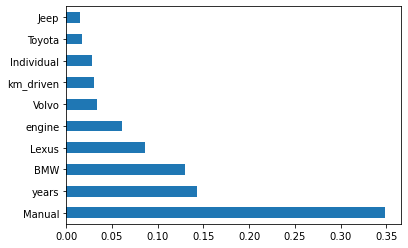

In [47]:
# for feature importance
tree_reg = ExtraTreeRegressor()
tree_reg.fit(X,y)
print(tree_reg.feature_importances_)
# imp_feature = tree_reg.
# print(imp_feature)

#Top 5 important feature
features_importance = pd.Series(tree_reg.feature_importances_,index=X.columns)
features_importance.nlargest(10).plot(kind='barh')
plt.show()

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
model = RandomForestRegressor()

I'm not scaling the value because I'm using random forest and random forest uses decision tree which will not require scaling

In [49]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [50]:
random_regressor = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, random_state=42, n_jobs = 1)

In [51]:
random_regressor.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [52]:
random_regressor.best_params_

{'n_estimators': 1100,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [53]:
model = RandomForestRegressor(n_estimators = 1100,
                             min_samples_split = 15,
                             min_samples_leaf = 2,
                             max_features = 'auto',
                             max_depth = 20,
                             bootstrap = False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([409999.83333333, 444200.        , 507500.        , ...,
       698564.33663367, 592083.25      , 664888.88888888])

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

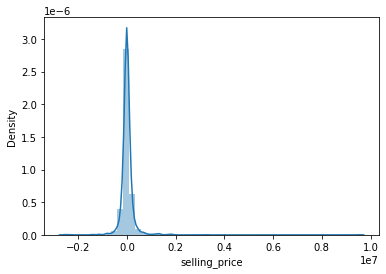

In [54]:
sns.distplot(y_test-y_pred)

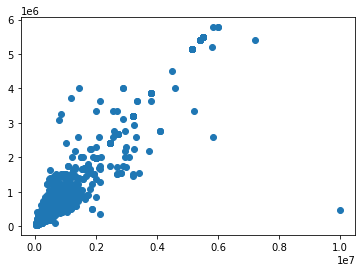

In [55]:
plt.scatter(y_test,y_pred)

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8453820758068831

In [57]:
# import pickle
# pickle.dump(random_regressor,open('model1.pkl','wb'))

In [58]:
# random_regressor.predict(np.array([5.59,27000,0,8,0,1,0,1]).reshape(1,-1))